# Lecture 19 - Numerical Integration

Last time, finite-difference approximations were developed and used to evaluate derivatives numerically.  In this lecture, we'll explore and implement our own numerical methods for evaluation of integrals.  We'll also use the SciPy module for the first time, which provides its own set of tools for numerical integration.

### Objectives

By the end of this lesson, you should be able to

- Evaluate definite integrals numerically using left- and right-sided Riemann sums, the mid-point rule, and the trapezoid rule.
- Evaluate definite integrals numerically using the built-in functions of `scipy.integrate`
- Establish the order of an integration scheme using graphical means

### Key Terms

- Riemann sum
- left-sided Riemann sum
- right-sided Riemann sum
- mid-point rule
- trapezoid rule
- `scipy.integrate`
- `scipy.integrate.quad`
- $n$th-order approximation

## Riemann Sums in Practice

For $df/dx$, choose two or more values of $f$ (forward, backward, etc.) and take $\Delta$ to some small but finite value.

For $\int^b_a f(x) dx$, we have analogs to these choices based on how we define the rectangles (or other shapes).

Recall the formal definition for a definite integral:

$$
  \int^b_a f(x) dx = 
     \lim_{n \to \infty} \sum^{n}_{i=1} f \left ( \overbrace{i \frac{b-a}{n} + a}^{x_i} \right )
     \overbrace{\frac{b-a}{n}}^{\Delta} 
$$

for uniformly spaced points $x_i =  a + \Delta, a + 2\Delta, \ldots, b - \Delta, b$.

If we *don't take the limit*, we have the **right-sided Riemann sum** approximation 

$$
  \int^b_a f(x) dx \approx \Delta \sum^{n}_{i=1} f \left ( i \Delta + a \right )
$$

where

$$
 \Delta = \frac{b-a}{n} \, .
$$

and $n$ is the number of rectangles.

*Note*: the formula is for *constant* step $\Delta$!  Put $\Delta_i$ inside the sum if not constant.


Let's look at this concretely for $f(x) = x^2$ over $x\in[0, 1]$ with $n=5$:

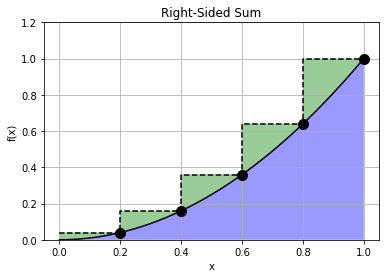

In [4]:
import riemann_sum_plots
riemann_sum_plots.right_sided_sum()

If instead we defined our sum to be

$$
  S =\frac{b-a}{n} \sum^{n}_{i=1} f \Bigg ( \frac{ (i-1)(b-a) }{n} + a \Bigg ) 
$$

the picture becomes

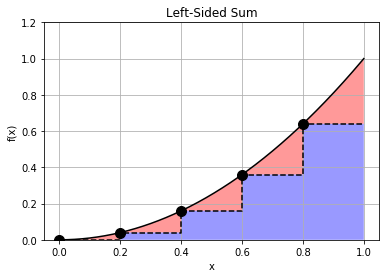

In [6]:
riemann_sum_plots.left_sided_sum()

**Exercise**: Use the left-sided sum to estimate $\int^2_0 e^x dx$ for 10, 100, and 1000 evenly-spaced points.  What is the *absolute* error for each?

In [ ]:
import numpy as np
I_ref = np.exp(2.0) - 1.0
I_10, I_100, I_1000 = 0.0, 0.0, 0.0


**Exercise**:  Consider the following two columns of data:

| $x$   | $\sqrt{x}$ |
|-------|------------|
|0.0000 | 0.0000     |
|0.3333 | 0.5774     |
|1.0000 | 1.0000     |
|1.5000 | 1.2247     |
|2.0000 | 1.4142     |

Estimate $\int^2_0 f(x) dx$ using the right-sided sum and left-sided sum.  Note that the $x$ points are **not evenly spaced**.

In [ ]:
import numpy as np
x = np.array([0, 0.3333, 1.0000, 1.5000, 2.0000])
f = np.array([0, 0.5774, 1.0000, 1.2247, 1.4142])

## Beyond the One-Side Sums

We can do better.  As motivation, note that the central difference is nothing
but an *average* of the forward and backward differences:

$$
  \frac{1}{2} \Bigg ( \frac{f(x+h)-f(x)}{h} + \frac{f(x)-f(x-h)}{h} \Bigg ) = \frac{f(x+h)-f(x-h)}{2h}
$$

**Option I**: evaluate $f$ at the average (middle) $x$ points: 

$$
 S = \frac{b-a}{n} \sum^{n}_{i=1} f \Bigg ( \frac{ (i-1/2)(b-a) }{n} + a \Bigg ) 
$$
  
for which the picture becomes

In [ ]:
riemann_sum_plots.midpoint_sum()

This is the **midpoint rule**.  It is great if *you* get to choose your points, but hard to apply to tabulated data.

**Option II**: Use the same points as one-sides sums, but *average* the $f$ values:

$$
\begin{split}
  S &= \frac{b-a}{2n} 
    \Bigg [ \sum^{n}_{i=1} f \Bigg ( \frac{ (i)(b-a) }{n} + a \Bigg ) 
         +  \sum^{n}_{i=1} f \Bigg ( \frac{ (i-1)(b-a) }{n} + a \Bigg ) \Bigg ] \\
    &= \frac{b-a}{2n} 
    \Bigg [ f(a) + f(b) + \sum^{n-1}_{i=1} f \Bigg ( \frac{ i(b-a) }{n} + a \Bigg ) \Bigg ]  
\end{split}
$$

This is the **trapezoid rule** for uniformly-spaced points. 

## What About Accuracy?

It is possible to determine the *order* of various numerical integration rules.  The basic idea is to observe the (absolute) error between an exact, reference value for an integral and the approximation of that integral for various step sizes $\Delta$.

 - The left- and right-sided sums are *first order*
 - The midpoint and trapezoid rules are *second order*

## Using `scipy.integrate`

The module `scipy.integrate` provides several integration functions, including the powerful `quad` function:

```
In [99]: help(quad)
Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
```

**Exercise**:  Use `quad` to evaluate $\int^2_0 e^x dx = e^2 - 1$.

**Exercise**:  Use `quad` to evaluate $\int^1_0 (ax^2 + bx + c)dx$ for $a=b=c=1$.

**Exercise**: The entropy change of an ideal gas from $(T_1, p_1)$ to $(T_2, p_2)$ is

$$
s(T_2, p_2) - s(T_1, p1) = \int^{T_2}_{T_1} \frac{c_p(T)}{T} dT - R \ln \frac{p_2}{p_1}
$$

where $s$ is entropy (kJ/kg-K), $p$ is pressure (kPa), $T$ is temperature (K), $c_p$ is the specific heat at constant pressure (kJ/kg-K), and $R$ is the gas constant (kJ/kg-K).  For a particular gas, $R = 0.18$, and 

$$
 c_p = R(2.5 + 8.7\cdot 10^{-3} T - 6.7\cdot 10^{-4}T^2  + 2.0 \cdot 10^{-5} T^3 + 1.1 \cdot 10^{-7} T^4 \, .
$$

Determine the entropy change from $T_1 = 400$ K and $p_1 = 1$ atm to $T_2 = 900$K and $p_2 = 10$ atm.

## Recap


By the end of this lesson, you should be able to

- Evaluate definite integrals numerically using left- and right-sided Riemann sums, the mid-point rule, and the trapezoid rule.
- Evaluate definite integrals numerically using the built-in functions of `scipy.integrate`
- Establish the order of an integration scheme using graphical means